In [53]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from itertools import permutations 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, Normalizer

In [54]:
# # Define Paths

# train_num='1'
# test_num='7'
# num_nanowires='100'
# Time = '30'
# test_type='LDA' #LDA
# kernel_type='linear' #linear, rbf - kernel options for SVM
# date_of_training='14'
# date_of_testing='14'

# multi_class=1 #CHANGE HERE FOR MULTI-CLASS LDA/SVM (1 = yes, 0 = no)
# if multi_class:
#     m='_multi-class_YES'
# else:
#     m='_multi-class_NO'

# # path="C:/Users/aloe8475/Documents/PhD/GitHub/CODE/Adrian's Code/NETWORK_sims_2/Saved Networks/Simulations Only/Python Data/"

# #     save_path='C:/Users/aloe8475/Documents/PhD/GitHub/CODE/Data/Figures/' + test_type + '/Python LDA/'
# else:
#     save_path='C:/Users/aloe8475/Documents/PhD/GitHub/CODE/Data/Figures/' + test_type + '/'

# #Train with a testing file:
# # filename_train = path + 'Net_Sx_20_NoW100_03_25-2019_11_23_38_Zdenka_Square_1SimsOnly_10_Sec_4Electrodes_Vmax_0.5_Testing Simulation_' + train_num + '_' + date_of_training + '-Jun-2019_ForPython.mat'

# #Train with normal file:
# filename_train = path + 'Net_Sx_20_NoW100_03_25-2019_11_23_38_Zdenka_Square_1SimsOnly_10_Sec_4Electrodes_Vmax_0.5_Training Simulation_' + train_num + '_' + date_of_training + '-Jun-2019_ForPython.mat'
# filename_train_save= test_type+'_Training Simulation_'+ train_num + '_' + Time + '_Sec_' + num_nanowires +'nw_' + date_of_training + '-Jun-2019' 

# #Test with training file:
# # filename_test = path + 'Net_Sx_20_NoW100_03_25-2019_11_23_38_Zdenka_Square_1SimsOnly_10_Sec_4Electrodes_Vmax_0.5_Training Simulation_' + test_num + '_' + date_of_testing + '-Jun-2019_ForPython.mat'

# #Test with normal file
# filename_test = path+ 'Net_Sx_20_NoW100_03_25-2019_11_23_38_Zdenka_Square_1SimsOnly_10_Sec_4Electrodes_Vmax_0.5_Testing Simulation_' + test_num +'_14-Jun-2019_ForPython.mat'

# if test_type == 'SVM':
#     filename_test_save= test_type+'_'+kernel_type+'_kernel'+'_Testing Simulation_' + test_num +'_' + Time + '_Sec_' + num_nanowires + 'nw_' + date_of_testing + '-Jun-2019' 
# else:
#     filename_test_save= test_type+'_Testing Simulation_' + test_num +'_' + Time + '_Sec_' + num_nanowires + 'nw_' + date_of_testing + '-Jun-2019' 

# # filename = 'Alon_Code/Data/Testing/Extracted_test_2.mat'

In [55]:
# Load Samples for Early/Mid/Late/Never

path= r"C:/Users/aloe8475/Dropbox (Sydney Uni)/Data/ASN_simulation/Python/ASN/data/Uncollapsed/"

classifier = loadmat(path+'emln.mat')['bang']
pairinglist=loadmat(path+'ElecPos.mat')['elecPos']-1
pairinglist[0,:] = np.array([4,17])
pairinglist[80,:] = np.array([22, 80])
pairinglist[81,:] = np.array([99, 81])




In [56]:
early = np.where(classifier[0] == 0)[0]
mid = np.where(classifier[0] == 1)[0]
late = np.where(classifier[0] == 2)[0]
never = np.where(classifier[0] == 3)[0]

sep=[50, 500, 1000]

In [57]:
earlyRand=np.random.choice(early,1)[0]
midRand=np.random.choice(mid,1)[0]
lateRand=np.random.choice(late,1)[0]
neverRand=np.random.choice(never,1)[0]

In [58]:
earlyPair=pairinglist[earlyRand]
midPair=pairinglist[midRand]
latePair=pairinglist[lateRand]
neverPair=pairinglist[neverRand]

In [59]:
randPairings = [earlyPair, midPair, latePair, neverPair]

In [60]:
sperm = [i for i in permutations([0,1,2,3],3)]
(randPairings[sperm[0][0]], randPairings[sperm[0][1]] ,randPairings[sperm[0][2]])

for i in range(len(sperm)):
    print((randPairings[sperm[i][0]],randPairings[sperm[i][1]],randPairings[sperm[i][2]]))
    
spermTime = [i for i in permutations([0,1,2],3)]
(sep[spermTime[0][0]], sep[spermTime[0][1]])

for i in range(len(spermTime)):
    print((sep[spermTime[i][0]], sep[spermTime[i][1]], sep[spermTime[i][2]]))

(array([54, 42], dtype=uint8), array([47, 33], dtype=uint8), array([ 1, 88], dtype=uint8))
(array([54, 42], dtype=uint8), array([47, 33], dtype=uint8), array([75, 76], dtype=uint8))
(array([54, 42], dtype=uint8), array([ 1, 88], dtype=uint8), array([47, 33], dtype=uint8))
(array([54, 42], dtype=uint8), array([ 1, 88], dtype=uint8), array([75, 76], dtype=uint8))
(array([54, 42], dtype=uint8), array([75, 76], dtype=uint8), array([47, 33], dtype=uint8))
(array([54, 42], dtype=uint8), array([75, 76], dtype=uint8), array([ 1, 88], dtype=uint8))
(array([47, 33], dtype=uint8), array([54, 42], dtype=uint8), array([ 1, 88], dtype=uint8))
(array([47, 33], dtype=uint8), array([54, 42], dtype=uint8), array([75, 76], dtype=uint8))
(array([47, 33], dtype=uint8), array([ 1, 88], dtype=uint8), array([54, 42], dtype=uint8))
(array([47, 33], dtype=uint8), array([ 1, 88], dtype=uint8), array([75, 76], dtype=uint8))
(array([47, 33], dtype=uint8), array([75, 76], dtype=uint8), array([54, 42], dtype=uint8))

In [61]:
spermTime

[(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)]

In [62]:
sep[spermTime[0][2]]

1000

In [65]:
for i in range(len(sperm)):
    simNum_Train=randPairings[sperm[i][0]]
    simNum_Test1=randPairings[sperm[i][1]]
    simNum_Test2=randPairings[sperm[i][2]]
    print(simNum_Train, simNum_Test1, simNum_Test2)
    plotTimeSeries(VSource1_Test,VSource1_Train,IDrain1_Train,IDrain1_Test,IDrain2_Test,VSource2_Test)


[54 42] [47 33] [ 1 88]


NameError: name 'VSource1_Test' is not defined

In [66]:
for i in range(len(sperm)):
    trainTest(VSource1_Test,VSource1_Train,IDrain1_Train,IDrain1_Test,IDrain2_Test,VSource2_Test)

NameError: name 'trainTest' is not defined

In [64]:
# Explore
def plotTimeSeries(VSource1_Test,VSource1_Train,IDrain1_Train,IDrain1_Test,IDrain2_Test,VSource2_Test):
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))

    axes[0].plot(VSource1_Train.ravel(), label = 'VSource Train'); axes[0].plot(VSource1_Test.ravel(), label = 'VSource Test'); axes[0].plot(VSource2_Test.ravel(), label = 'VSource Test2')
    axes[0].set_title("Input to device - Target for learning (y)"); axes[0].set_xlabel('Time'); axes[0].set_ylabel('V')
    axes[0].legend()
    axes[1].plot(IDrain1_Train.ravel(), label = 'IDrain Train'); axes[1].plot(IDrain1_Test.ravel(), label = 'IDrain Test'); axes[1].plot(IDrain2_Test.ravel(), label = 'IDrain Test2')
    axes[1].set_title("Output of device - Features for learning (X)"); axes[1].set_xlabel('Time'); axes[1].set_ylabel('A')
    axes[1].legend()

    # fig.savefig(save_path + filename_train_save + m + '_Training_Parameters_'+datetime.datetime.now().strftime("%Y-%m-%d") +'.jpg')
    # fig.savefig(save_path + filename_train_save + m +'_Training_Parameters_'+datetime.datetime.now().strftime("%Y-%m-%d") +'.eps')
    return axes

In [67]:
def trainTest(IDrain1_Train,VSource1_Train,IDrain2_Test,VSource2_Test,IDrain1_Test,VSource1_Test, sep, spermTime, randPairings, sperm):
# Split the data
    clf=[]
    for i in range(len(spermTime)):
        sep_Train=sep[spermTime[i][0]]
        sep_Test1=sep[spermTime[i][1]]
        sep_Test2=sep[spermTime[i][2]]
        
        
# LOAD DATA        
#     sep_Train=[]
#     sep_Test1=[]
#     sep_Test2=[]

#     for i in range(len(spermTime)):
#         sep_Train.append([sep[spermTime[i][0]]])
#         sep_Test1.append([sep[spermTime[i][1]]])
#         sep_Test2.append([sep[spermTime[i][2]]])

        file_train=[]
        file_test1=[]
        file_test2=[]
        # for i in range(100):
    # file_train.append(loadmat(path+'source_'+str(pairinglist[i,0])+'_drain_'+str(pairinglist[i,1]))['sep_' + str(sep_Train)])
    # file_test1.append(loadmat(path+'source_'+str(pairinglist[i,0])+'_drain_'+str(pairinglist[i,1]))['sep_' + str(sep_Test1)])
    # file_test2.append(loadmat(path+'source_'+str(pairinglist[i,0])+'_drain_'+str(pairinglist[i,1]))['sep_' + str(sep_Test2)])
        file_train.append(loadmat(path+'source_'+str(randPairings[sperm[0][0]][0])+'_drain_'+str(randPairings[sperm[0][0]][1]))['sep_' + str(sep_Train)])
        file_test1.append(loadmat(path+'source_'+str(randPairings[sperm[0][1]][0])+'_drain_'+str(randPairings[sperm[0][1]][1]))['sep_' + str(sep_Test1)])
        file_test2.append(loadmat(path+'source_'+str(randPairings[sperm[0][2]][0])+'_drain_'+str(randPairings[sperm[0][2]][1]))['sep_' + str(sep_Test2)])

        # Load the Training data
        # Load Early/Mid/Late/Never
        IDrain1_Train=file_train[0][0][0]['IDrain1']
        VSource1_Train=file_train[0][0][0]['VSource1']
        # Load other combo
        IDrain1_Test=file_test1[0][0][0]['IDrain1']
        VSource1_Test=file_test1[0][0][0]['VSource1']
        IDrain2_Test=file_test2[0][0][0]['IDrain1']
        VSource2_Test=file_test2[0][0][0]['VSource1']
        # IDrain = data['IDrain']#.todense()
        # VSource = data['VSource']
        # IDrain1_Train=IDrain[:,0].todense()
        # IDrain2_Train=IDrain[:,1].todense()
        # VSource1_Train=VSource[:,0]
        # VSource2_Train=VSource[:,1

        start_time = 0
        # X = np.hstack([IDrain1_Train, IDrain2_Train])[start_time:]
        X = IDrain1_Train[start_time:].reshape(-1,1)

        y = VSource1_Train[start_time:].reshape(-1,1)
        y = (y == np.nanmax(y))

        X_Test=IDrain1_Test[start_time:].reshape(-1,1)
        X_Test2=IDrain2_Test[start_time:].reshape(-1,1)
        y_Test=VSource1_Test[start_time:].reshape(-1,1)
        y_Test = (y_Test == np.nanmax(y_Test))
        y_Test2=VSource2_Test[start_time:].reshape(-1,1)
        y_Test2 = (y_Test == np.nanmax(y_Test2))

        # y2 = VSource2_Train[start_time:].ravel()
        # y2 = (y2 == np.nanmax(y2)) * 2
        # if multi_class:
        #     y = y + y2

        # # X[:,1] = X[:,1] / X[:,0]
        # scalar = StandardScaler()
        # # scalar = Normalizer(norm = 'l2')
        # X = scalar.fit_transform(X)
        # # # X = (X - X.mean(axis = 0)) / X.std(axis = 0)
        # # # X = (X - X.mean(axis = 0)) / X.std(axis = 0)
        # # # X = (X - X.mean(axis = 1)) / X.std(axis = 1)
        # # X = np.asarray(X) * 1

        # # sns.kdeplot(X[:,0][y], X[:,1][y])
        # # sns.kdeplot(X[:,0][~y], X[:,1][~y])
        # fig, axes = plt.subplots(1, 2, figsize=(16, 4))

        # axes[0].scatter(X[:,0], X[:,1], c = y, marker = 'x', cmap = 'Set1', alpha = 0.1);

        # axes[1].plot(X[:,0], label = 'IDrain1'); axes[1].plot(X[:,1], label = 'IDrain2')
        # axes[1].set_title("Output of device - Features for learning (X)"); axes[1].set_xlabel('Time'); axes[1].set_ylabel('A')
        # axes[1].legend()
        # Training
        # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0, random_state = 0)

        # if test_type=='SVM':
        # clf = SVC(kernel = 'linear', C = 1, probability = True).fit(X, y) #change kernel here
        # elif test_type=='LDA':
        clf.append(LinearDiscriminantAnalysis().fit(X, y))
        # clf = RandomForestClassifier().fit(X_train, y_train)

        y_pred = clf.predict(X_Test2)

        y_pred2 = clf.predict(X_Test)

        print('Test 1 accuracy:', clf.score(X_Test, y_Test), '| Time Delay:', sep_Test1, '| Test Class:', classifier[0][simNum_Test1], '| Train Class:',  classifier[0][simNum_Train])
        print('Test 2 accuracy:', clf.score(X_Test2, y_Test2), '| Time Delay:', sep_Test2, '| Test Class:', classifier[0][simNum_Test2], '| Train Class:',  classifier[0][simNum_Train])
        return clf

array([68, 67], dtype=uint8)

In [264]:
# y_pred

In [265]:
# clf.predict_proba(X_test)

In [147]:
# Plot
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

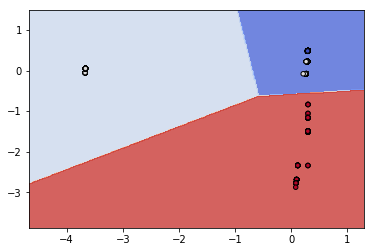

In [148]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots()
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

fig.savefig(save_path + filename_train_save + m + '_Training_Classification_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.jpg')
fig.savefig(save_path + filename_train_save + m + '_Training_Classification_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.eps')


In [149]:
# Load the test data
data_test = loadmat(filename_test)

In [150]:
IDrain = data_test['IDrain']#.todense()
VSource = data_test['VSource']
IDrain1_Test=IDrain[:,0].todense()
IDrain2_Test=IDrain[:,1].todense()
VSource1_Test=VSource[:,0]
VSource2_Test=VSource[:,1]

In [151]:
new_start_time = 0
X_test = np.hstack([IDrain1_Test, IDrain2_Test])[new_start_time:]

# X[:,1] = X[:,1] / X[:,0]
X_test = scalar.transform(X_test)
# scalar = Normalizer(norm = 'l1')
# X_test = scalar.transform(X_test)
# X_test = (X_test - X_test[start_time:].mean(axis = 0)) / X_test[start_time:].std(axis = 0)
# X_test = (X_test - X_test.mean(axis = 1)) / X_test.std(axis = 1)

# X_test = (X_test - X_test.mean(axis = 0)) / X_test.std(axis = 0)
# X = (X - X.mean(axis = 1)) / X.std(axis = 1)
X_test = np.asarray(X_test) * 1

y = VSource1_Test[new_start_time:].ravel()
y = (y == y.max())
y2 = VSource2_Test[new_start_time:].ravel()
y2 = (y2 == np.nanmax(y2)) * 2
if multi_class:
    y_test = y + y2

y_pred = clf.predict(X_test)

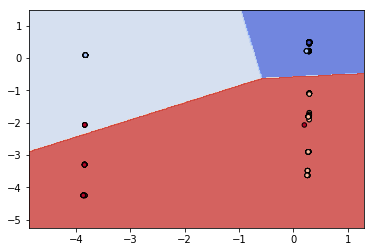

In [152]:
X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots()
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

fig.savefig(save_path + filename_train_save + '_' + filename_test_save + m +  '_Testing_Classification_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.jpg')
fig.savefig(save_path + filename_train_save + '_' + filename_test_save + m + '_Testing_Classification_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.eps')

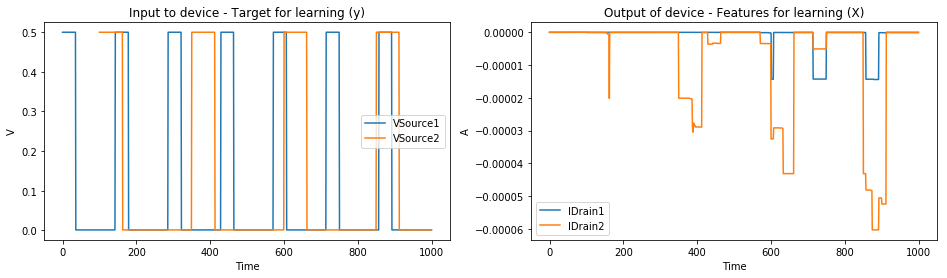

In [153]:
# Explore
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].plot(VSource1_Test, label = 'VSource1'); axes[0].plot(VSource2_Test, label = 'VSource2')
axes[0].set_title("Input to device - Target for learning (y)"); axes[0].set_xlabel('Time'); axes[0].set_ylabel('V')
axes[0].legend()
axes[1].plot(IDrain1_Test, label = 'IDrain1'); axes[1].plot(IDrain2_Test, label = 'IDrain2')
axes[1].set_title("Output of device - Features for learning (X)"); axes[1].set_xlabel('Time'); axes[1].set_ylabel('A')
axes[1].legend()

fig.savefig(save_path + filename_train_save + '_' + filename_test_save + m + '_Testing_Parameters_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.jpg')
fig.savefig(save_path + filename_train_save + '_' + filename_test_save + m + '_Testing_Parameters_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.eps')

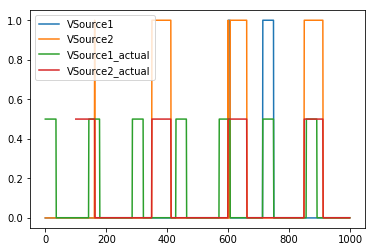

In [154]:
plt.plot(y_pred == 1, label = 'VSource1')
plt.plot(y_pred == 2, label = 'VSource2')
plt.plot(VSource1_Test, label = 'VSource1_actual')
plt.plot(VSource2_Test, label = 'VSource2_actual')
plt.legend()
plt.savefig(save_path + filename_train_save + '_' + filename_test_save + '_' + test_type + m +  '_Prediction_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.jpg')
plt.savefig(save_path + filename_train_save + '_' + filename_test_save + '_' + test_type + m + '_Prediction_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.eps')